,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


== Medias ==
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


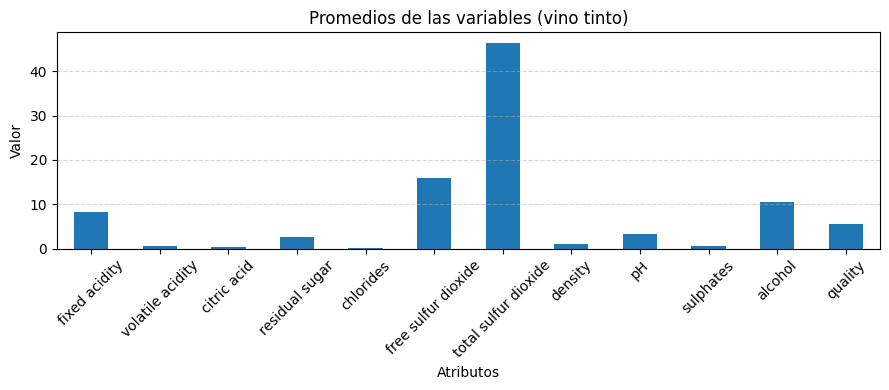


Promedio de alcohol: 10.42

== Medianas ==
fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64


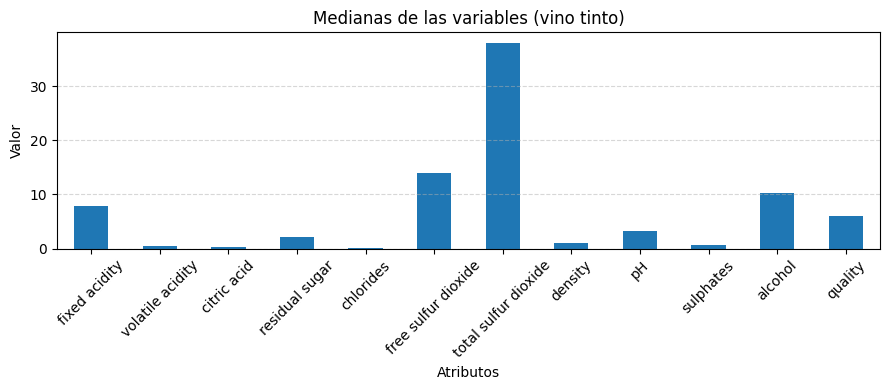


Mediana de alcohol: 10.20

== Modas (primera moda por columna) ==
fixed acidity            7.2000
volatile acidity         0.6000
citric acid              0.0000
residual sugar           2.0000
chlorides                0.0800
free sulfur dioxide      6.0000
total sulfur dioxide    28.0000
density                  0.9972
pH                       3.3000
sulphates                0.6000
alcohol                  9.5000
quality                  5.0000
Name: 0, dtype: float64


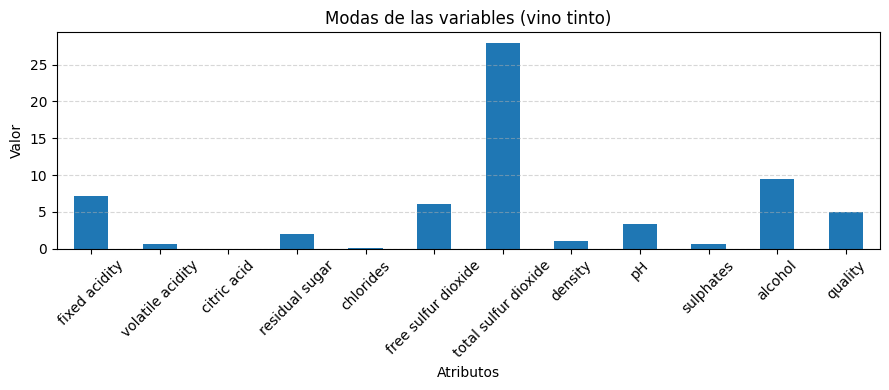


Moda de alcohol: 9.50


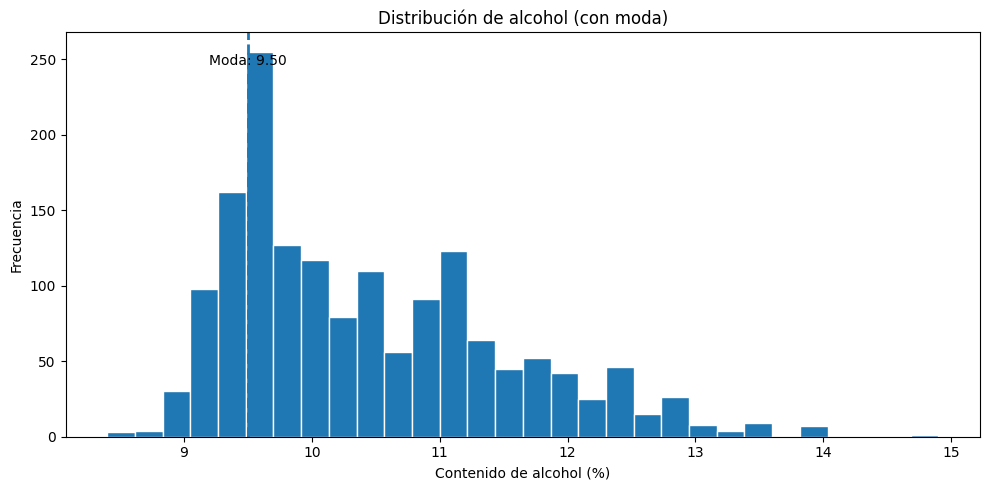


Rango del alcohol: 6.50


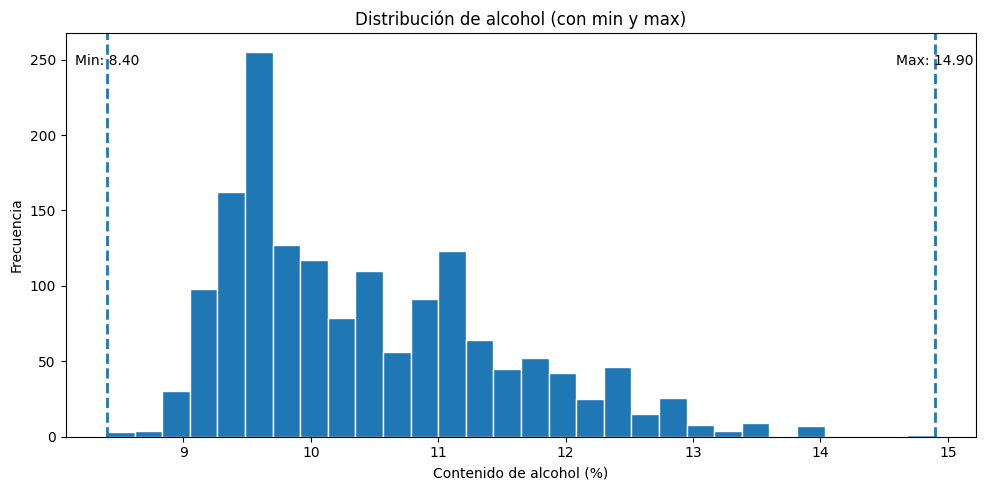


Varianza muestral del alcohol: 1.1356


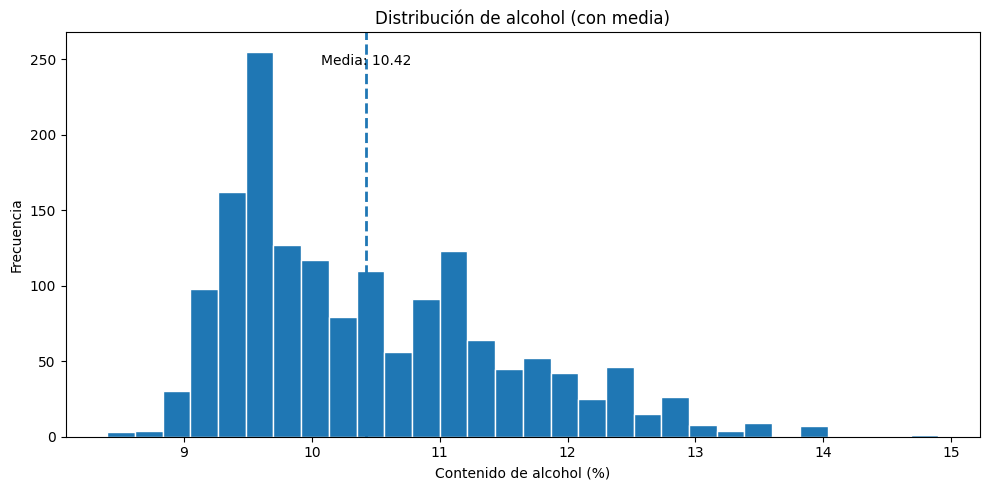

Desviación estándar muestral del alcohol: 1.0657


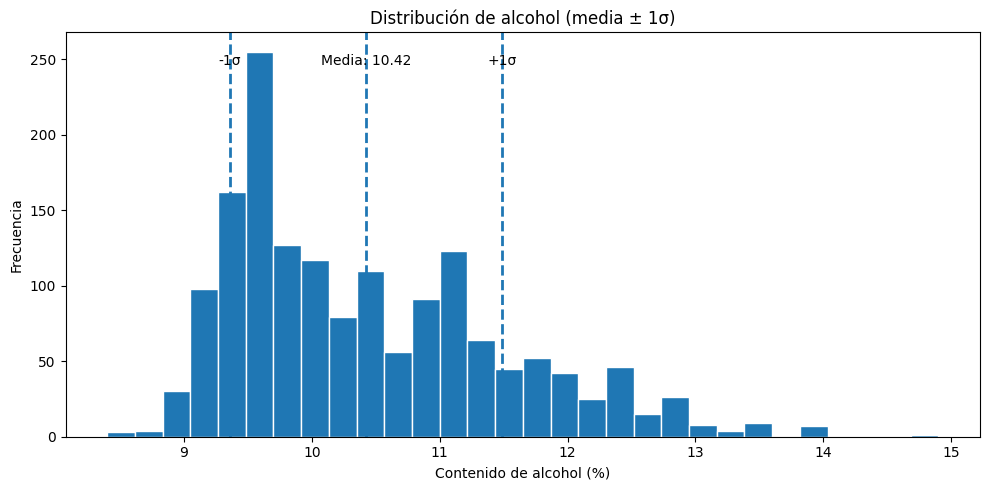


== Cuartiles e IQR (alcohol) ==
Q1: 9.5000
Q2 (Mediana): 10.2000
Q3: 11.1000
IQR: 1.6000


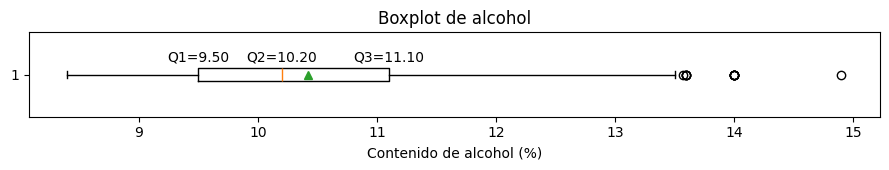

In [1]:
# =========================================================
# Descriptive Statistics — Red Wine (UCI)  | 
# =========================================================

# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) Carga de datos
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(DATA_URL, sep=";")
display(df.head())

# 3) Ploteo
def barra_series(s, titulo, ylabel="Valor", xlabel="Atributos", rot=45):
    ax = s.plot(kind="bar", figsize=(9,4))
    ax.set_title(titulo)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=rot)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

def hist_lineas(x, titulo, xlabel, vlines=None, labels=None):
    """
    x: serie/array
    vlines: lista de valores verticales a marcar
    labels: lista de textos (misma longitud que vlines) o None
    """
    plt.figure(figsize=(10,5))
    plt.hist(x, bins=30, edgecolor="white")
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel("Frecuencia")
    if vlines is not None:
        for i, v in enumerate(vlines):
            plt.axvline(v, linestyle="--", linewidth=2)
            if labels and i < len(labels):
                ymin, ymax = plt.ylim()
                plt.text(v, ymax*0.92, labels[i], ha="center")
    plt.tight_layout()
    plt.show()

# 4) Medidas de tendencia central
# --- Media (promedio)
avg_all = df.mean(numeric_only=True)
print("== Medias ==")
print(avg_all)
barra_series(avg_all, "Promedios de las variables (vino tinto)")

alcohol_mean = df["alcohol"].mean()
print(f"\nPromedio de alcohol: {alcohol_mean:.2f}")

# --- Mediana
med_all = df.median(numeric_only=True)
print("\n== Medianas ==")
print(med_all)
barra_series(med_all, "Medianas de las variables (vino tinto)")

alcohol_median = df["alcohol"].median()
print(f"\nMediana de alcohol: {alcohol_median:.2f}")

# --- Moda
mode_df = df.mode(numeric_only=True).iloc[0]
print("\n== Modas (primera moda por columna) ==")
print(mode_df)
barra_series(mode_df, "Modas de las variables (vino tinto)")

alcohol_mode = df["alcohol"].mode().iloc[0]
print(f"\nModa de alcohol: {alcohol_mode:.2f}")

# Hist con la moda marcada
hist_lineas(
    df["alcohol"],
    titulo="Distribución de alcohol (con moda)",
    xlabel="Contenido de alcohol (%)",
    vlines=[alcohol_mode],
    labels=[f"Moda: {alcohol_mode:.2f}"]
)

# 5) Medidas de dispersión
# --- Rango (max - min)
alc_min = df["alcohol"].min()
alc_max = df["alcohol"].max()
alc_range = float(alc_max - alc_min)
print(f"\nRango del alcohol: {alc_range:.2f}")

hist_lineas(
    df["alcohol"],
    titulo="Distribución de alcohol (con min y max)",
    xlabel="Contenido de alcohol (%)",
    vlines=[alc_min, alc_max],
    labels=[f"Min: {alc_min:.2f}", f"Max: {alc_max:.2f}"]
)

# --- Varianza (muestral: ddof=1)
alcohol_var = np.var(df["alcohol"], ddof=1)
print(f"\nVarianza muestral del alcohol: {alcohol_var:.4f}")

# Hist con media (línea)
alc_mean = df["alcohol"].mean()
hist_lineas(
    df["alcohol"],
    titulo="Distribución de alcohol (con media)",
    xlabel="Contenido de alcohol (%)",
    vlines=[alc_mean],
    labels=[f"Media: {alc_mean:.2f}"]
)

# --- Desviación estándar (muestral: ddof=1)
alcohol_std = np.std(df["alcohol"], ddof=1)
print(f"Desviación estándar muestral del alcohol: {alcohol_std:.4f}")

# Hist con media y ±1σ
hist_lineas(
    df["alcohol"],
    titulo="Distribución de alcohol (media ± 1σ)",
    xlabel="Contenido de alcohol (%)",
    vlines=[alc_mean - alcohol_std, alc_mean, alc_mean + alcohol_std],
    labels=["-1σ", f"Media: {alc_mean:.2f}", "+1σ"]
)

# --- Cuartiles e IQR
q1, q2, q3 = np.percentile(df["alcohol"], [25, 50, 75])
iqr = q3 - q1
print("\n== Cuartiles e IQR (alcohol) ==")
print(f"Q1: {q1:.4f}")
print(f"Q2 (Mediana): {q2:.4f}")
print(f"Q3: {q3:.4f}")
print(f"IQR: {iqr:.4f}")

# Boxplot (solo alcohol)
plt.figure(figsize=(9, 1.8))
plt.boxplot(df["alcohol"], vert=False, showmeans=True)
plt.title("Boxplot de alcohol")
plt.xlabel("Contenido de alcohol (%)")
# Anotaciones sobre el eje x (encima del boxplot)
y_text = 1.15  # ligeramente arriba del boxplot
ymin, ymax = plt.ylim()
plt.text(q1, y_text, f"Q1={q1:.2f}", ha="center")
plt.text(q2, y_text, f"Q2={q2:.2f}", ha="center")
plt.text(q3, y_text, f"Q3={q3:.2f}", ha="center")
plt.tight_layout()
plt.show()
